In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 5
from datetime import datetime

In [4]:
# Explanation
#
# Download data: https://support.strava.com/hc/en-us/articles/216918437-Exporting-your-Data-and-Bulk-Export
#
# Strava data comes in two main file types
# - a CSV file with the list of activities identified by Activity ID and some basic information (date, distance, etc)
# - a GPX file per activity with the full track.
#
# With the GPX we can do two main things:
# - save into a GeoDataFrame with just the track as a single row and geometry, without timestamp, as a line string:
# df = gpd.read_file("myfile.gpx", layer='tracks')
#
# - save into a GeoDataFrame with the full track with timestamps, where each trackpoint gets a single row:
# df = gpd.read_file("myfile.gpx", layer='track_points')

<Axes: >

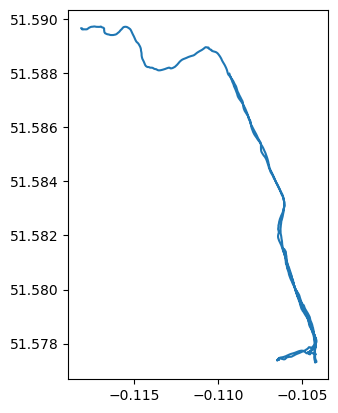

In [7]:
gdf_sample = gpd.read_file("strava/activities/3326714330.gpx", layer='tracks')
gdf_sample.plot()

In [9]:
gdf_sample.head()

,name,cmt,desc,src,link1_href,link1_text,link1_type,link2_href,link2_text,link2_type,number,type,geometry
0,Afternoon Run,None,None,None,None,None,None,None,None,None,NaN,running,"MULTILINESTRING ((-0.1182 51.58968, -0.11814 5..."


<Axes: >

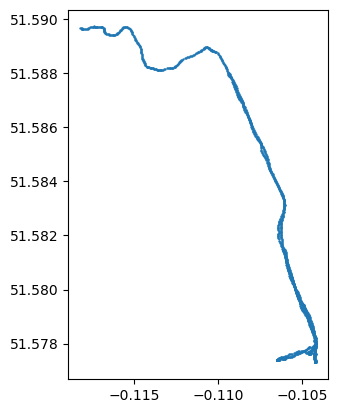

In [11]:
gdf_sample_plus = gpd.read_file("strava/activities/3326714330.gpx", layer='track_points')
gdf_sample_plus.plot(markersize=0.5) # this isn't particularly useful, but just to show that it's a collection of points, not a line

In [13]:
gdf_sample_plus.head()

,track_fid,track_seg_id,track_seg_point_id,ele,time,magvar,geoidheight,name,cmt,desc,...,sym,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid,geometry
0,0,0,0,26.8,2020-04-20 15:42:04+00:00,NaN,NaN,None,None,None,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.1182 51.58968)
1,0,0,1,26.8,2020-04-20 15:42:05+00:00,NaN,NaN,None,None,None,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.11814 51.58967)
2,0,0,2,26.7,2020-04-20 15:42:06+00:00,NaN,NaN,None,None,None,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.11809 51.58966)
3,0,0,3,26.7,2020-04-20 15:42:08+00:00,NaN,NaN,None,None,None,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.11809 51.58966)
4,0,0,4,26.7,2020-04-20 15:42:09+00:00,NaN,NaN,None,None,None,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.11809 51.58966)


In [15]:
# Let's get started
# Here we select all activities
df = pd.read_csv("strava/activities.csv")

In [17]:
df

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,Activity Count,Total Steps,Carbon Saved,Pool Length,Training Load,Intensity,Average Grade Adjusted Pace,Timer Time,Total Cycles,Media
0,3326714330,"Apr 20, 2020, 3:42:04 PM",Afternoon Run,Run,Let's start tracking my failed attempts at get...,2169,4.68,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3336767893,"Apr 22, 2020, 4:14:17 PM",#RunForHeroes #5kChallenge #cymru,Run,NaN,1930,5.09,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/9d7e573c-bf9d-48ec-a438-38aa6ae026cb.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,11896396202,"Jul 15, 2024, 6:57:22 PM",Evening Run,Run,NaN,1882,5.07,176.0,35.0,False,...,NaN,4924.0,NaN,NaN,NaN,NaN,2.820417,NaN,NaN,NaN
510,12683406582,"Aug 28, 2024, 6:02:19 PM",Evening Run,Run,NaN,1887,4.32,171.0,39.0,False,...,NaN,4648.0,NaN,NaN,NaN,NaN,2.530778,NaN,NaN,NaN


In [19]:
# Checking if the date is the right datatype
df['Activity Date'].dtype

dtype('O')

In [21]:
# It's not, so we convert the column to be a data
df['Activity Date'] = pd.to_datetime(df['Activity Date'], format='mixed') 
df['Activity Date'].dtype

dtype('<M8[ns]')

In [23]:
# Filter the dates to be between March and end of July 2020
mask = (df['Activity Date'] > '15/03/2020') & (df['Activity Date'] <= '31/07/2020')
activities_lockdown = df.loc[mask]
activities_lockdown.head()
# we'll only use the activity ID to find the actual .gpx file, and distance

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,Activity Count,Total Steps,Carbon Saved,Pool Length,Training Load,Intensity,Average Grade Adjusted Pace,Timer Time,Total Cycles,Media
0,3326714330,2020-04-20 15:42:04,Afternoon Run,Run,Let's start tracking my failed attempts at get...,2169,4.68,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3336767893,2020-04-22 16:14:17,#RunForHeroes #5kChallenge #cymru,Run,NaN,1930,5.09,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/9d7e573c-bf9d-48ec-a438-38aa6ae026cb.jpg
2,3346363757,2020-04-24 15:35:44,First sub-30 5K done,Run,NaN,1728,5.01,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/eebcfe3f-d7f8-43e5-ba16-20fb8774478c.jpg
3,3355146540,2020-04-26 09:51:09,Chilled Sunday run with shopping break,Run,NaN,2427,4.94,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3366650435,2020-04-28 16:15:46,Bit grim out there,Run,NaN,1742,5.01,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/8a76765e-34f5-4ca2-adc3-aa63cfc1f6ce.jpg


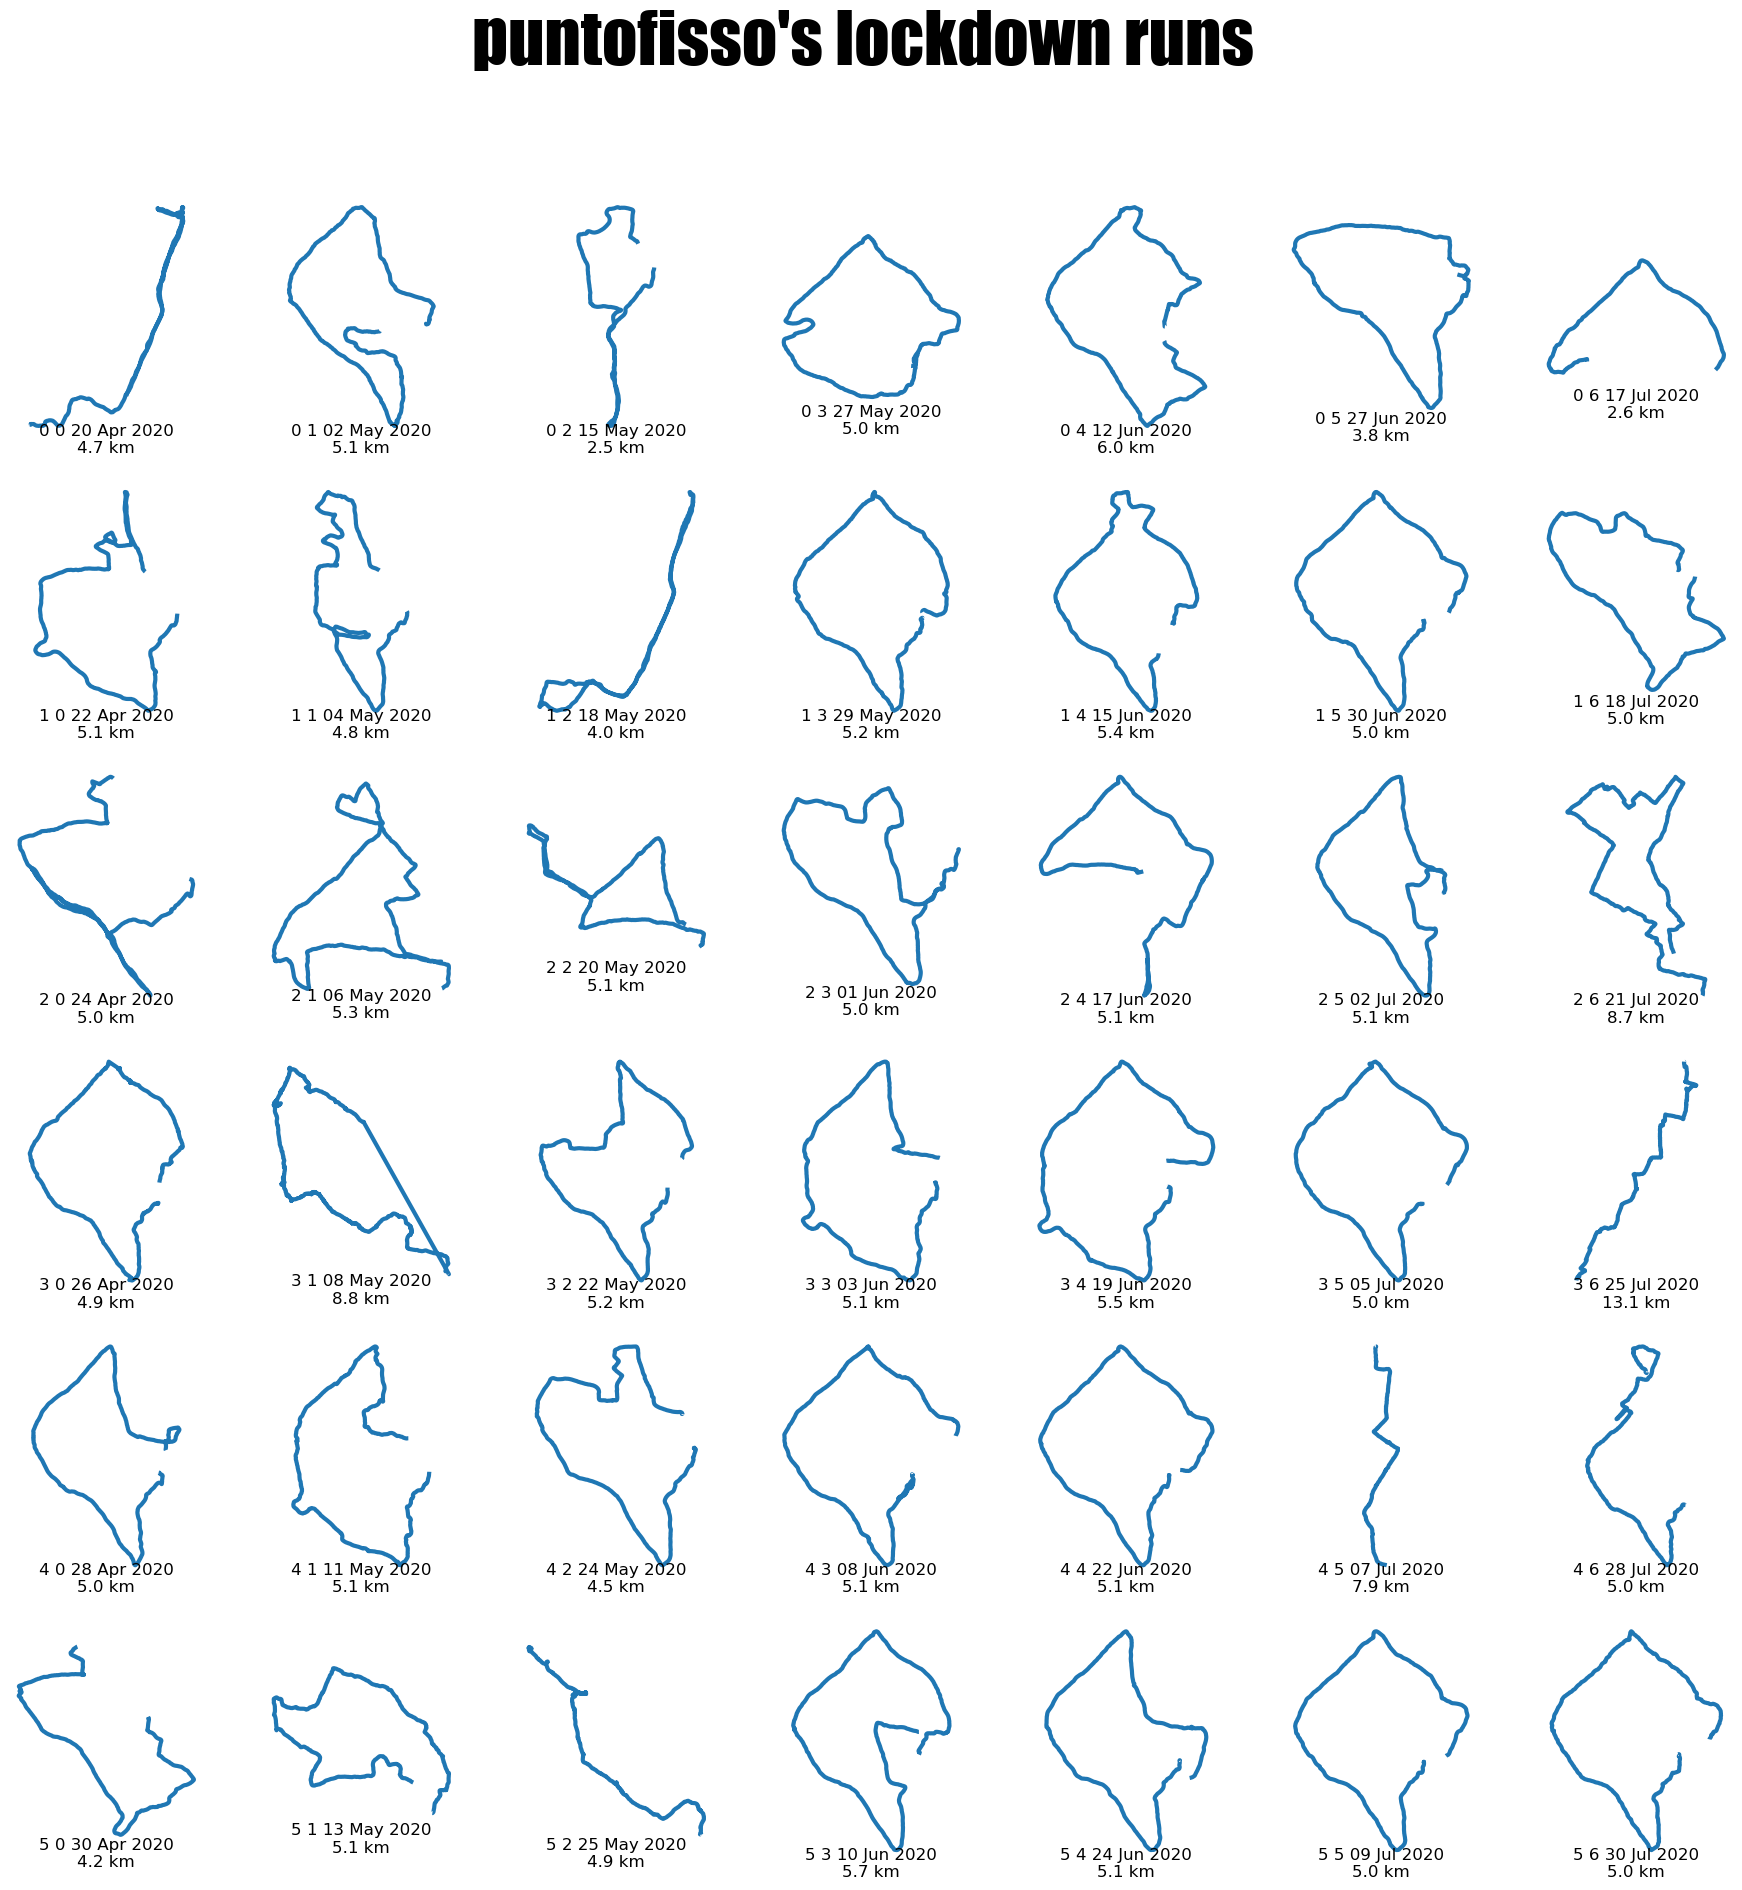

In [87]:
# Let's chart the activities as a grid

# General chart settings

# These four lines create the grid and make it as big as the screen
# Make sur e that columns and rows are consistent with the total number (if the grid slots < rows, it will be messy)
columns=6
rows=7
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, axs = plt.subplots(columns, rows ,figsize=(1800*px, 1800*px))
# Chart title settings 
fdct = {'color': 'k', 'fontsize': 50, 'fontweight': 3, 'family': 'Impact'}
st = fig.suptitle("puntofisso's lockdown runs", y=1.05, **fdct) 
# This gives the chart a better grid setting
fig.tight_layout() 

i = 0
j = 0

for index, row in activities_lockdown.iterrows():
    
    # select the file for each activity
    file = "strava/activities/" + str(row['Activity ID']) + ".gpx"
    gdf = gpd.read_file(file, layer='tracks')

    # Settings of each plot in the grid, by passing axes
    thisax = axs[i,j]
    thisax.xaxis.set_visible(False)
    thisax.yaxis.set_visible(False)
    thisax.invert_yaxis()

    # Settings for each plot in the grid
    thisax.set_title(str(i) + " " + str(j) + " " + row['Activity Date'].strftime('%d %b %Y') + "\n" + str(round(row['Distance'],1)) + " km",y=0.2, pad=-25, verticalalignment="top")
    thisax.legend(" ").set_visible(False)
    thisax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

    gdf.plot( ax=thisax, linewidth=3 )
    
    # Modulo math to make sure we're in the right slot
    i = ( i + 1 ) 
    if (i % columns )  == 0:
        j = ( j + 1 ) 
        i = 0
        if (j % rows) == 0:
            j = 0

    
# "Hide" empty slots in the grid
[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]
        
plt.savefig('RUNS-grid.png', dpi=300, format='png', metadata=None, bbox_extra_artists=[st], bbox_inches='tight') # must come before show
plt.show()

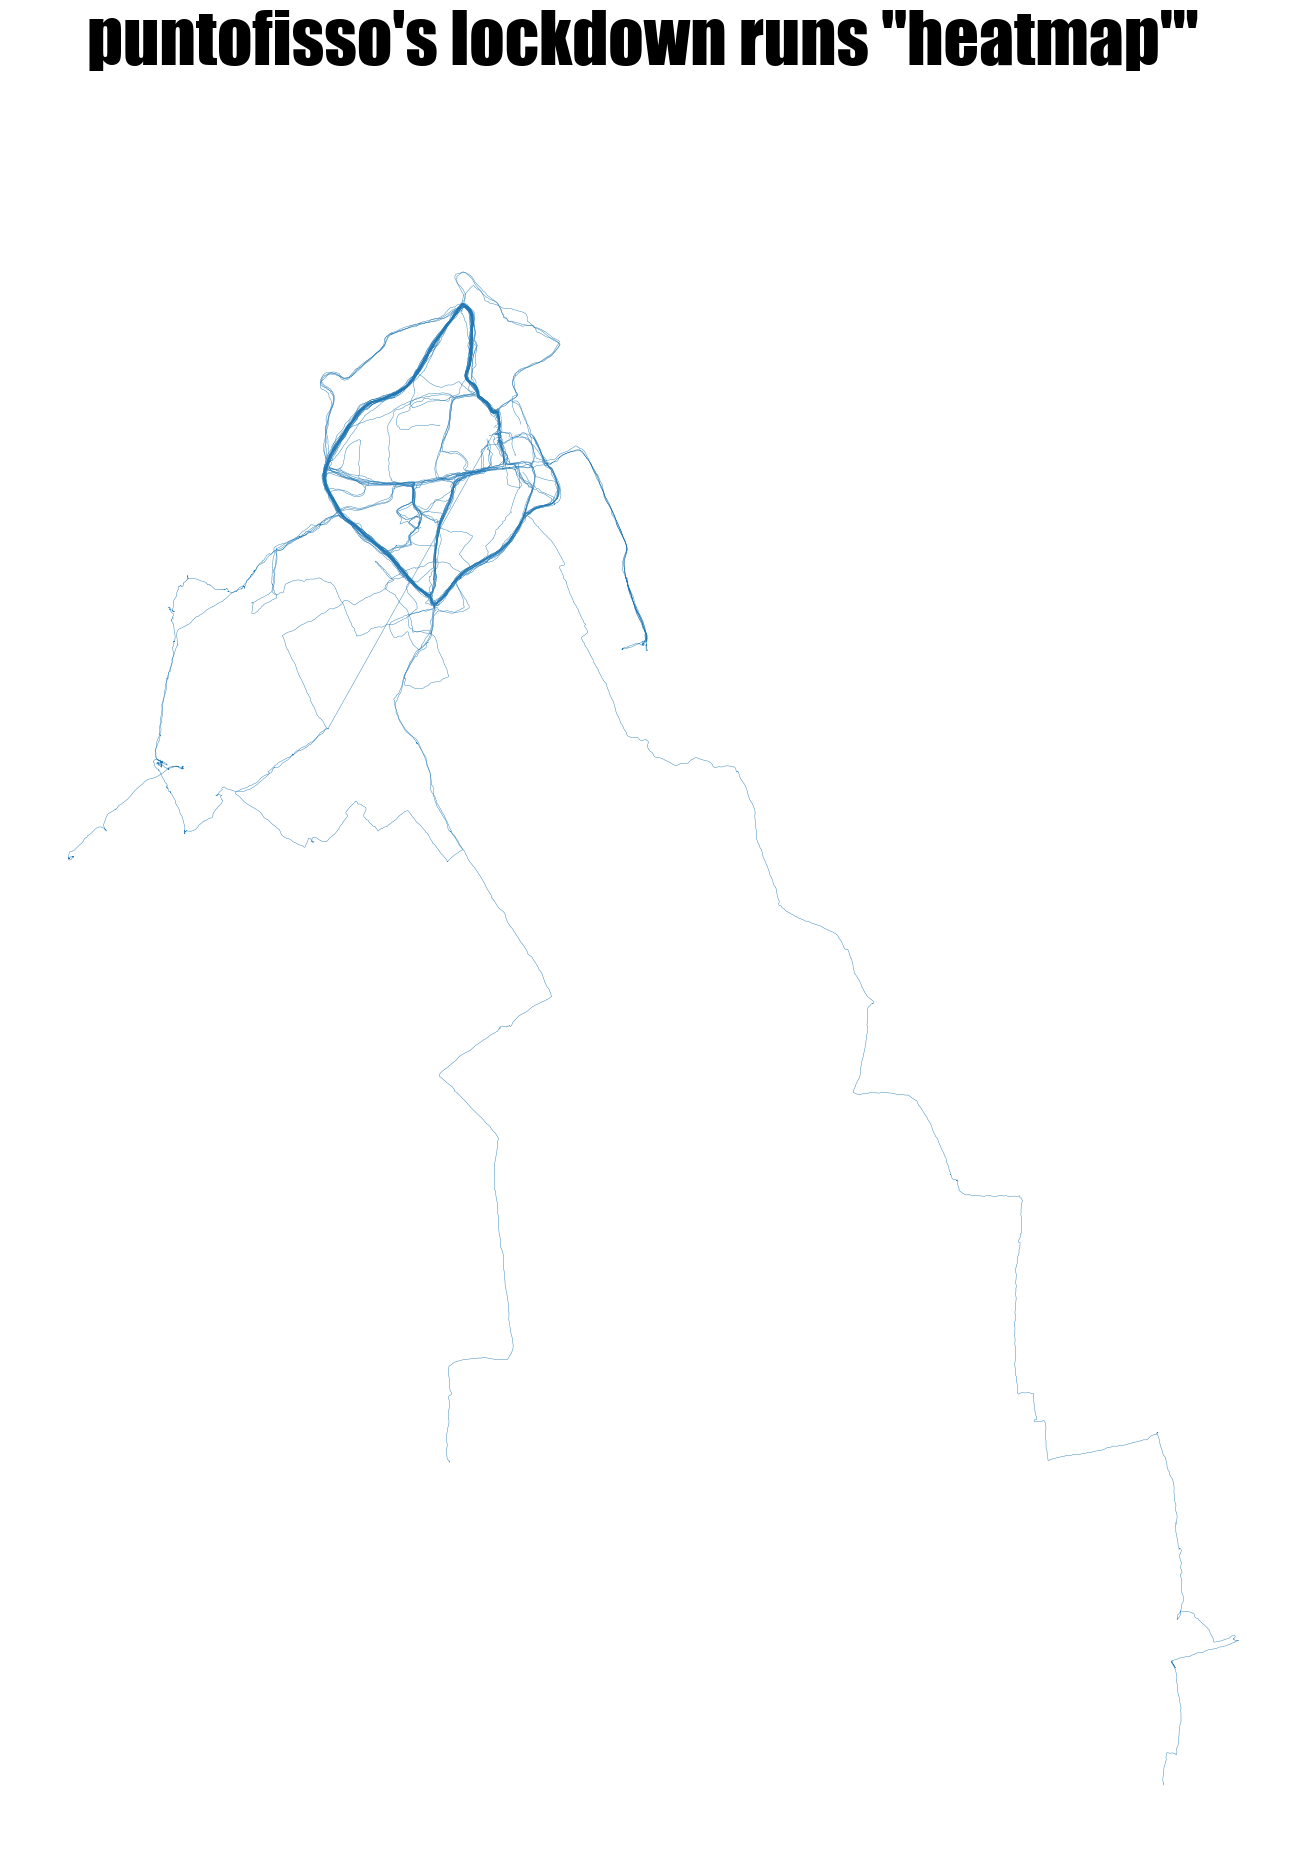

In [88]:
# Heatmap-like on one single plot
# TODO: there must be better, more mathematical ways of doing this

# General chart settings

# These four lines create the grid and make it as big as the screen
# Note: 1x1 grid, but you don't need to do it this way (just porting the code above)
columns=1
rows=1
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, axs = plt.subplots(columns,rows,figsize=(1800*px, 1800*px))
# Chart title settings 
fdct = {'color': 'k', 'fontsize': 50, 'fontweight': 3, 'family': 'Impact'}
st = fig.suptitle("puntofisso's lockdown runs \"heatmap'\"", y=1.05, **fdct) 
# This gives the chart a better grid setting
fig.tight_layout() 



for index, row in activities_lockdown.iterrows():

    # select the file for each activity
    file = "strava/activities/" + str(row['Activity ID']) + ".gpx"
    gdf = gpd.read_file(file, layer='tracks')

    # Settings of each plot in the grid, by passing axes
    thisax = axs
    thisax.xaxis.set_visible(False)
    thisax.yaxis.set_visible(False)
    thisax.invert_yaxis()

    # Settings for each plot in the grid
    thisax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

    gdf.plot( ax=thisax, linewidth=0.3 )

        
plt.savefig('RUNS-heatmap.png', dpi=300, format='png', metadata=None, bbox_extra_artists=[st], bbox_inches='tight') # must come before show
plt.show()